*****************************************************************
#  The Social Web 
- Instructors Jacco van Ossenbruggen, Dayana Spagnuelo
- TAs Michael Accetto, Oktay Kavi, Abhirup Mukherjee, Nihat Uzunalioğlu
*****************************************************************

Prerequisites:
- Python 3.8
- Python packages: twitter, prettytable, matplotlib

First you need to know how to retrieve some social web data. Exercises 1 and 2 will show you how to retrieve trends and search results from Twitter. 

But let's check first if we're running a sufficiently new version of Python:

In [42]:
import platform
import sys
print("This jupyter notebook is running on Python " + platform.python_version())
# It's good practice to assert packages requirements at the beginning of a script:
assert sys.version_info >= (3, 6) # Tested with Python==3.7.5

This jupyter notebook is running on Python 3.8.0


Let's install now the required packages for this hands on session:

In [43]:
# If you're using a virtualenv, make sure its activated before running 
# this cell!
!pip install twitter PrettyTable matplotlib

## Part 1: Authorizing an application to access Twitter account data (from Example 1-1/9-1 in Mining the Social Web):

1. Make sure to add your mobile phone number to your private twitter profile.
2. Go to https://apps.twitter.com/ and click on "create an app". Twitter will prompt you to create a *developer account*.
3. You'll receive an *account confirmation* email with a link. Follow it and create an app. 
4. Once the app is created, you'll see a "Keys and Token" item on the top left-hand side corner of the webpage. These values will be needed to fill in the next cell.
5. Please delete all your keys before submission.

In [44]:
import twitter # Tell Python to use the twitter package
CONSUMER_KEY = 'FAbqbVdJayi3yKuaUcZf9hrmn'
CONSUMER_SECRET = 'lmXhbcqVBEps6lMULr4QsQUDn3NPGPQB8dSRAnHphUG8Uq3qaN'
# to get the oauth credential you need to click on the 'Generate access token' button:
OAUTH_TOKEN = '1454475914511794185-ZfyTUMZ92mUFGDlYnJxUTEllebp5Zx'
OAUTH_TOKEN_SECRET = 'BShxMUZQQ7I2CGDqwnWhwFZ8nEsHSuCzoPVXM9PofRFYo'
auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,CONSUMER_KEY, CONSUMER_SECRET)
twitter_api = twitter.Twitter(auth=auth)
print(twitter_api) 
# Nothing to see by displaying twitter_api except that it's now a defined variable


### 1.1: Retrieving twitter search trends (from Example 1-2/9-2 in Mining the Social Web)

In [45]:
WORLD_WOE_ID = 1 # The "Yahoo! Where On Earth ID" for the entire world
world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID) # get back a callable
print(world_trends)

[{'trends': [{'name': 'West Ham', 'url': 'http://twitter.com/search?q=%22West+Ham%22', 'promoted_content': None, 'query': '%22West+Ham%22', 'tweet_volume': 98125}, {'name': '#WHULIV', 'url': 'http://twitter.com/search?q=%23WHULIV', 'promoted_content': None, 'query': '%23WHULIV', 'tweet_volume': 53519}, {'name': 'Liverpool', 'url': 'http://twitter.com/search?q=Liverpool', 'promoted_content': None, 'query': 'Liverpool', 'tweet_volume': 130053}, {'name': 'Origi', 'url': 'http://twitter.com/search?q=Origi', 'promoted_content': None, 'query': 'Origi', 'tweet_volume': 11427}, {'name': 'David Moyes', 'url': 'http://twitter.com/search?q=%22David+Moyes%22', 'promoted_content': None, 'query': '%22David+Moyes%22', 'tweet_volume': None}, {'name': 'Trent', 'url': 'http://twitter.com/search?q=Trent', 'promoted_content': None, 'query': 'Trent', 'tweet_volume': 38225}, {'name': '#FBvKYS', 'url': 'http://twitter.com/search?q=%23FBvKYS', 'promoted_content': None, 'query': '%23FBvKYS', 'tweet_volume': 13

### Task 1
Twitter uses WOEIDs. Find out how WORLD_WOE_IDs were originally defined by Yahoo! and try to use others in a query. What kind of differences do you find between the worldwide trends and the local trends? 


In [46]:
#
# since we are currently in amsterdam we consider the term "local" as Amsterdam and Netherlands
LOCAL_Amsterdam_WOE_ID = 727232
LOCAL_Netherlands_WOE_ID = 23424909
local_Amsterdam_trends = twitter_api.trends.place(_id=LOCAL_Amsterdam_WOE_ID)
local_Netherlands_trends = twitter_api.trends.place(_id=LOCAL_Netherlands_WOE_ID)
print(local_Amsterdam_trends)
print(local_Netherlands_trends)
# at the time of running this code, #coronadebat, #BVBAJA, #dorAja and etc. are the trends in Amsterdam and Netherlands. while in world trend '#いい推しの日', 'Elden Ring', 'I VOTE' ane etc. are trends.
# it seems top 50 trends which is returned by Twitter API is different than our 2 local trends.
# Another interesting is the amsterdam and Netherlands have same trends but different in "twitter_volume". And some of the trends in Amsterdam have more twitter_volume which makes no sense (We discussed it with you in the classroom)
# Another interesting thing was some trends had "twitter_volume" of none.

[{'trends': [{'name': '#COYG', 'url': 'http://twitter.com/search?q=%23COYG', 'promoted_content': None, 'query': '%23COYG', 'tweet_volume': 11168}, {'name': '#feyaz', 'url': 'http://twitter.com/search?q=%23feyaz', 'promoted_content': None, 'query': '%23feyaz', 'tweet_volume': None}, {'name': '#vitutr', 'url': 'http://twitter.com/search?q=%23vitutr', 'promoted_content': None, 'query': '%23vitutr', 'tweet_volume': None}, {'name': 'West Ham', 'url': 'http://twitter.com/search?q=%22West+Ham%22', 'promoted_content': None, 'query': '%22West+Ham%22', 'tweet_volume': 98125}, {'name': 'Dessers', 'url': 'http://twitter.com/search?q=Dessers', 'promoted_content': None, 'query': 'Dessers', 'tweet_volume': None}, {'name': 'Liverpool', 'url': 'http://twitter.com/search?q=Liverpool', 'promoted_content': None, 'query': 'Liverpool', 'tweet_volume': 130053}, {'name': '#WHULIV', 'url': 'http://twitter.com/search?q=%23WHULIV', 'promoted_content': None, 'query': '%23WHULIV', 'tweet_volume': 53807}, {'name': 

### 1.2: Retrieving search results (from Example 1-5/9-3 in Mining the Social Web):

In [47]:
q = '#ThrowbackThursday' # XXX: Set this variable to a trending topic, or anything else you like. 
count = 100 # number of results to retrieve

# See https://dev.twitter.com/docs/api/1.1/get/search/tweets for more info

search_results = twitter_api.search.tweets(q=q, count=count) # search for your query 'q' 100 times
statuses = search_results['statuses'] # extract the tweets found

# The following code allows you to print in a nice format the contents of search_results
import json
print(type(statuses))
print(json.dumps(statuses[0], indent=1))

<class 'list'>
{
 "created_at": "Sun Nov 07 18:37:38 +0000 2021",
 "id": 1457416973864734724,
 "id_str": "1457416973864734724",
 "text": "RT @siima: #ThrowbackThursday Aren't they adorable??\ud83d\ude0d\ud83d\ude0d @alluarjun \n.\n.\n.\n.\n#siima #AlluArjun4fans #AlluSnehaReddy #couple #Throwback https:\u2026",
 "truncated": false,
 "entities": {
  "hashtags": [
   {
    "text": "ThrowbackThursday",
    "indices": [
     11,
     29
    ]
   },
   {
    "text": "siima",
    "indices": [
     75,
     81
    ]
   },
   {
    "text": "AlluArjun4fans",
    "indices": [
     82,
     97
    ]
   },
   {
    "text": "AlluSnehaReddy",
    "indices": [
     98,
     113
    ]
   },
   {
    "text": "couple",
    "indices": [
     114,
     121
    ]
   },
   {
    "text": "Throwback",
    "indices": [
     122,
     132
    ]
   }
  ],
  "symbols": [],
  "user_mentions": [
   {
    "screen_name": "siima",
    "name": "SIIMA",
    "id": 593761929,
    "id_str": "593761929",
    "indices": [
  

### Task 2

In the cell below, create a second variable (e.g. `statuses2`) that holds the results of a query other than the one presented above. Think about a query that would yield very different results than the first one, for example one that may yield a shorter output or about a different topic.

In [48]:
q = '#Burger' # XXX: Set this variable to a trending topic, or anything else you like.
count = 20 # number of results to retrieve

# See https://dev.twitter.com/docs/api/1.1/get/search/tweets for more info

search_results = twitter_api.search.tweets(q=q, count=count) # search for your query 'q' 100 times
statuses2 = search_results['statuses'] # extract the tweets found

# The following code allows you to print in a nice format the contents of search_results
import json
print(type(statuses2))
print(json.dumps(statuses2[0], indent=1))

<class 'list'>
{
 "created_at": "Sun Nov 07 18:43:06 +0000 2021",
 "id": 1457418347570778113,
 "id_str": "1457418347570778113",
 "text": "RT @_Aloominati_: Don't cry piggies, its okay to be burned alive because the one who is funding this is a dog &amp; cat lover. She even lets he\u2026",
 "truncated": false,
 "entities": {
  "hashtags": [],
  "symbols": [],
  "user_mentions": [
   {
    "screen_name": "_Aloominati_",
    "name": "Aloominati",
    "id": 1051882496340750338,
    "id_str": "1051882496340750338",
    "indices": [
     3,
     16
    ]
   }
  ],
  "urls": []
 },
 "metadata": {
  "iso_language_code": "en",
  "result_type": "recent"
 },
 "source": "<a href=\"http://twitter.com/download/android\" rel=\"nofollow\">Twitter for Android</a>",
 "in_reply_to_status_id": null,
 "in_reply_to_status_id_str": null,
 "in_reply_to_user_id": null,
 "in_reply_to_user_id_str": null,
 "in_reply_to_screen_name": null,
 "user": {
  "id": 2794584335,
  "id_str": "2794584335",
  "name": "Chris C

## Part 2: Extracting text, screen names, and hashtags from tweets (from Example 1-6 in Mining the Social Web)

Simply printing all the search results to screen is nice, but to really start analysing them, it is handy to select the interesting parts and store them in a different structure such as a list. 

In this example you are using a thing called "List Comprehension".

### 2.1 List Comprehensions
List comprehension is a powerful construct that allows to succinctly build a list.
With it you can process items from any iterable (e.g. dictionaries, lists, tuples, iterators...) and output a list while optionally performing an operation on each value.

Here's a few examples:

In [49]:
# double all values from 0 to 9
double_list = [i*2 for i in range(10)]
# raise to the power of 2, but only if the number is uneven
power_even_list = [i**2 for i in range(10) if i%2!=0]
# clean strings in a tuple
stripped_lines = [x.strip() for x in ('The\n', 'Social\n', 'Web\n')]
# return length of each string in stripped_lines
len_str_lines = [len(s) for s in stripped_lines]
# finally, we can nest list comprehensions to flatten a list of lists:
list_of_lists = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
range_9 = [x for y in list_of_lists for x in y]

print(double_list)
print(power_even_list)
print(stripped_lines)
print(len_str_lines)
print(range_9)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
[1, 9, 25, 49, 81]
['The', 'Social', 'Web']
[3, 6, 3]
[1, 2, 3, 4, 5, 6, 7, 8, 9]


### 2.2 Parsing text, screen names and hashtags from tweets
*(from Example 1-6 in Mining the Social Web)*

Hereafter, we'll be creating a variable `status_texts` of type list. \
The list will be filled with the `text` elements from each `status`, whereas `status` comes from looping through all `statuses` in the `search_results` list (1.2). \
Look up the list comprehensions in your Python reference materials to make sure you understand what's happening here. 

In [50]:
status_texts = [ status['text'] for status in statuses ]
# the escape character "\" allows for the list comprehension to continue
# on a new line. While not strictly necessary, it makes code more readable
# for your fellow programmers.
screen_names = [ user_mention['screen_name'] for status in statuses \
                for user_mention in status['entities']['user_mentions'] ]

hashtags = [ hashtag['text'] for status in statuses \
        for hashtag in status['entities']['hashtags'] ]

# Compute a collection of all words from all tweets
words = [ w for t in status_texts for w in t.split() ] #split the string on the empty spaces

# Explore the first 5 items for each...
print(json.dumps(status_texts[0:5], indent=1))
print(json.dumps(screen_names[0:5], indent=1))
print(json.dumps(hashtags[0:5], indent=1))
print(json.dumps(words[0:5], indent=1))

[
 "RT @siima: #ThrowbackThursday Aren't they adorable??\ud83d\ude0d\ud83d\ude0d @alluarjun \n.\n.\n.\n.\n#siima #AlluArjun4fans #AlluSnehaReddy #couple #Throwback https:\u2026",
 "RT @MotownGospel: #ThrowbackThursday with @tashacobbs and her live performance at @theryman! Click the link below to listen to \"You're Gonn\u2026",
 "RT @78Derngate: A beautiful mono image taken by Bassett-Lowke of the wonderful hall/lounge here at 78 Derngate #ThrowbackThursday #throwbac\u2026",
 "RT @beezyandco: 12 Days of Christmas ornaments by Jan Brett - find this vintage item on @Etsy at BeezyAndCo - link in bio #vintage #etsy #C\u2026",
 "RT @paulinepark: #ThrowbackThursday: with Michael \uae40\ub450\uc0b0 (@Zen_Zinger) &amp; Katherine in Manhattan eight years ago (11.2.13) https://t.co/k6vFiSH\u2026"
]
[
 "siima",
 "alluarjun",
 "MotownGospel",
 "tashacobbs",
 "theryman"
]
[
 "ThrowbackThursday",
 "siima",
 "AlluArjun4fans",
 "AlluSnehaReddy",
 "couple"
]
[
 "RT",
 "@siima:",
 "#ThrowbackThursday",


### Task 3

You are now ready to parse usernames, hashtags and text from the results you previously obtained in Task 2 (e.g. `statuses_2`). While doing it, make sure to leave the variables created in 2.2 untouched. Instead, create your own variable names, which you'll be using soon.


In [51]:
#
#
status2_usernames = [ user_mention['screen_name'] for status in statuses2 \
                for user_mention in status['entities']['user_mentions'] ]

status2_hashtags = [ hashtag['text'] for status in statuses2 \
        for hashtag in status['entities']['hashtags'] ]

status2_texts = [ status['text'] for status in statuses2 ]

status2_words = [ w for t in status2_texts for w in t.split() ]

#
#
print(json.dumps(status2_texts[0:5], indent=1))
print(json.dumps(status2_usernames[0:5], indent=1))
print(json.dumps(status2_hashtags[0:5], indent=1))
print(json.dumps(status2_words[0:5], indent=1))

[
 "RT @_Aloominati_: Don't cry piggies, its okay to be burned alive because the one who is funding this is a dog &amp; cat lover. She even lets he\u2026",
 "BURGER/usdt \n4.13 ten al\u0131m yapt\u0131m arkada\u015flar hedeflerini ve destek diren\u00e7lerini yak\u0131nda payla\u015faca\u011f\u0131m orta vade g\u00fcze\u2026 https://t.co/q20whHnO8c",
 "A quien le apetece unas mini burgers? \ud83e\udd24\ud83c\udf54\n\n- \n\nhttps://t.co/REpsI6Ipup\n\ud83d\udcde 928 512 953\n\u2022\n\u2022\n\u2022\n\u2022\n\ud83d\udcf8 @maracreators\u2026 https://t.co/wslaalbWdr",
 "RT @Goinkolik: #Bel dedi\u011fim gibi WIN Reef vs..  :)) s\u0131ra neden burgerde gelmesin \u00e7ok bekledin #burger adetin \u00e7ok az 30-50 $ olman gerek #bu\u2026",
 "RT @puuung1: Love is in small things #lunchtime #burger https://t.co/rWsKn1qkQL"
]
[
 "_Aloominati_",
 "Goinkolik",
 "puuung1",
 "Paranin_Patronu",
 "_Aloominati_"
]
[
 "Bel",
 "burger",
 "lunchtime",
 "burger",
 "12Burger"
]
[
 "RT",
 "@_Aloominati_:",
 "Don'

## Part 3: Creating a basic frequency distribution from words in tweets
*(from Examples 1-7 in Mining the Social Web)* 


In the cell below we display the 10 most common hashtag instances:

In [52]:
from collections import Counter

for item in [words, screen_names, hashtags]:
    c = Counter(item)

print(c.most_common()[:10]) # top 10

[('throwbackthursday', 31), ('EnBrazosDeUnAsesino', 27), ('WilliamLevy', 27), ('ThrowbackThursday', 23), ('willevy', 15), ('BRAVO', 6), ('BoneyM', 6), ('siima', 2), ('AlluArjun4fans', 2), ('AlluSnehaReddy', 2)]


Your output should look something like this: \
`[('ThrowbackThursday', 34), ('throwbackthursday', 11), ('TBT', 6), ('ThrowBackThursday', 6), ('Trivia', 3), ('madoka_magica', 2), ('New', 2), ('EURO2020', 2), ('artists', 2)]`

### Task 4
Show hashtags frequency for results that you obtained in Task 3. Think about possible explanations for the different results you get from the analyses for the different queries.


In [53]:
#
#
for item in [status2_words, status2_usernames, status2_hashtags]:
    counter2 = Counter(item)
print(counter2.most_common()[:10])
#
# Based on the trending topic that we used at task 2, we will get different hashtags related to the trending topic we used.
# For example, we used #burger as trending topic. So, In the result, we got hashtags related to burger like food, restaurant, drink and etc.

# the code that you presented in the part 3. just outputs the results of hashtags. There is no need to put "words", "screen_names" in the array.
# for that purpose the code below is enough:

#   counter3 = Counter(status2_hashtags)
#   print(counter3.most_common()[:10])

# or you meant to print most_commons for all "words", "screen_name" and "hashtags" (just like example 1-7). for that the print should be inside the for loop.

[('burger', 8), ('Burger', 2), ('Bel', 1), ('lunchtime', 1), ('12Burger', 1), ('hotdog', 1), ('Burgers', 1), ('nom', 1), ('travel', 1), ('lookatourworld', 1)]


### 3.1 Storing your results
So far, we have been storing the data in working memory. Often it's handy to store your data to disk so you can retrieve it in a next session. 

The pickle module lets you do exactly that, by serializing data in a binary format.


In [54]:
import pickle

filepath = "my_data.pickle"
# this indented python syntax is broadly defined as "context manager".
# This means that everything happening under its indentation will use f
# as file handle to filepath. The Shortand `wb` stands for "write binary",
# which is how we serialize data to disk.
with open(filepath, "wb") as f:
    pickle.dump(words, f) # write the contents of list 'words' to file 'f'
    
# Note that, after the end of the indented block, the file is automatically closed.
# Hence, no memory resource on your system is wasted idly.

If you browse to your working directory, you should find a file there named "myData.pickle". You can open this in a text editor, or load its contents back into a variable to do some more analyses on.


In [55]:
# open the myData.pickle file and store its contents into variable 'words'

with open(filepath, "rb") as f:
    words = pickle.load(f)
print(words)

['RT', '@siima:', '#ThrowbackThursday', "Aren't", 'they', 'adorable??😍😍', '@alluarjun', '.', '.', '.', '.', '#siima', '#AlluArjun4fans', '#AlluSnehaReddy', '#couple', '#Throwback', 'https:…', 'RT', '@MotownGospel:', '#ThrowbackThursday', 'with', '@tashacobbs', 'and', 'her', 'live', 'performance', 'at', '@theryman!', 'Click', 'the', 'link', 'below', 'to', 'listen', 'to', '"You\'re', 'Gonn…', 'RT', '@78Derngate:', 'A', 'beautiful', 'mono', 'image', 'taken', 'by', 'Bassett-Lowke', 'of', 'the', 'wonderful', 'hall/lounge', 'here', 'at', '78', 'Derngate', '#ThrowbackThursday', '#throwbac…', 'RT', '@beezyandco:', '12', 'Days', 'of', 'Christmas', 'ornaments', 'by', 'Jan', 'Brett', '-', 'find', 'this', 'vintage', 'item', 'on', '@Etsy', 'at', 'BeezyAndCo', '-', 'link', 'in', 'bio', '#vintage', '#etsy', '#C…', 'RT', '@paulinepark:', '#ThrowbackThursday:', 'with', 'Michael', '김두산', '(@Zen_Zinger)', '&amp;', 'Katherine', 'in', 'Manhattan', 'eight', 'years', 'ago', '(11.2.13)', 'https://t.co/k6vFiSH

### 3.2 Using prettytable to display tuples in a nice way



In [56]:
from prettytable import PrettyTable
for label, data in (('Word', words),
                    ('Screen Name', screen_names),
                    ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count'])
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print(pt) 

+--------------------+-------+
| Word               | Count |
+--------------------+-------+
| RT                 |    52 |
| #throwbackthursday |    29 |
| de                 |    28 |
| Vía                |    27 |
| Facebook           |    27 |
| Rossi              |    27 |
| Lora               |    27 |
| 📸                 |    27 |
| @willylevy29       |    27 |
| detrás             |    27 |
+--------------------+-------+
+-----------------+-------+
| Screen Name     | Count |
+-----------------+-------+
| willylevy29     |    27 |
| WLWParaguay     |    10 |
| BoneyM_es       |     6 |
| WLWARGENTINA1   |     5 |
| siima           |     2 |
| alluarjun       |     2 |
| ShagpokeStudios |     2 |
| KatrinasWeb     |     2 |
| MotownGospel    |     1 |
| tashacobbs      |     1 |
+-----------------+-------+
+---------------------+-------+
| Hashtag             | Count |
+---------------------+-------+
| throwbackthursday   |    31 |
| EnBrazosDeUnAsesino |    27 |
| WilliamLevy  

### 3.3 Calculating lexical diversity for tweets 
*(from Example 1-9 in Mining the Social Web)*:

In [57]:
# Define a function for computing lexical diversity
def lexical_diversity(tokens):
    return 1.0*len(set(tokens))/len(tokens)

# Define a function for computing the average number of words per tweet
def average_words(statuses):
    total_words = sum([ len(s.split()) for s in statuses ])
    return 1.0*total_words/len(statuses)

# Let's use these functions:

print(lexical_diversity(words))
print(lexical_diversity(screen_names))
print(lexical_diversity(hashtags))
print(average_words(status_texts))

0.39569691300280635
0.48936170212765956
0.22674418604651161
16.196969696969695


### Task 5: What do the printed numbers indicate? Try to explain them.

The first printed lines (lexical_diversity):

Ratio of unique tokens to total number of tokens. tokens can be words, screen names and hashtags. Which means if the result is 0 it means no tokens were found and if result is 1. all tokens in the context is unique.
for instance, in ['burger', 'food', 'is', 'delicious', 'food'], we have 4 unique tokens (burger, food, is, delicious) while we have 5 tokens. That makes lexical diversity 4/5=0.8.

The last printed lines (average_words):

This shows average number of words in each tweet. For example in last sections there were 83 tweets which contained 1605 words. so by dividing 1605 by 83, we find that in average each tweet has 19.33 words.

### 3.4 Finding the most popular retweets 
*(from Example 1-10 in Mining the Social Web):*

In [58]:
retweet_cnt_un_txt = [(status['retweet_count'],
    status['retweeted_status']['user']['screen_name'],
    status['text'])# Store out a tuple of these three values
    for status in statuses # for each status
    if 'retweeted_status' in status # ... so long as the status meets this condition.
    ]

# Slice off the first 5 from the sorted results and display each item in the tuple
pt = PrettyTable(field_names=['Count', 'Screen Name', 'Text'])
[ pt.add_row(row) for row in sorted(retweet_cnt_un_txt, reverse=True)[:5] ]
pt.max_width['Text'] = 50
pt.align= 'l'
print(pt)

+-------+-----------------+----------------------------------------------------+
| Count | Screen Name     | Text                                               |
+-------+-----------------+----------------------------------------------------+
| 485   | siima           | RT @siima: #ThrowbackThursday Aren't they          |
|       |                 | adorable??😍😍 @alluarjun                          |
|       |                 | .                                                  |
|       |                 | .                                                  |
|       |                 | .                                                  |
|       |                 | .                                                  |
|       |                 | #siima #AlluArjun4fans #AlluSnehaReddy #couple     |
|       |                 | #Throwback https:…                                 |
| 485   | siima           | RT @siima: #ThrowbackThursday Aren't they          |
|       |                 | ad

### 3.5 Looking up users who have retweeted a status 
*(from Example 1-11 in Mining the Social Web):*

In [59]:
retweets = twitter_api.statuses.retweets(id=1224140327688249349) # Get the original tweet id for a tweet from its retweeted_status node and insert it here
print("Users who've retweeted the tweet:\n")
print([r['user']['screen_name'] for r in retweets])

Users who've retweeted the tweet:

['mblandnc', 'Connormccoolman', 'DarnMilk', 'coy_holt', 'QueenHarleyBee', 'MARKOPOLO100', 'SHAK_08', 'saabooboo', 'notJacksonfish', 'MartinFaced', 'cestkisa', 'abrewer18', 'ChrEEstosK', 'McCormacSpices', 'MahomieTrent', 'ChrisMcElfresh1']


### Task 6 (advanced)

If you have a Twitter account with a nontrivial number of tweets, request your historical tweet archive from your account settings and analyze it. \
The export of your account data includes files organized by time period in a convenient JSON format. See the README.txt file included in the downloaded archive for more details.



What are the most common terms that appear in your tweets? \
Who do you retweet the most often? \
How many of your tweets are retweeted (and why do you think this is the case)?

In [74]:
# We exported the account data but twitter gave us .js files, not the json file. We googled this and saw this is indeed the fact.

# the tweet.js file contains the info we need for analyze the tweets.

# Changing the content of js file to JSON format.

# the js file contains a part which is "window.YTD.tweet.part0 =" which should be removed inorder to make it to json.
# so we need to read the file and remove this specific part.

tweets_export_path = "tweet.js"

# the tweet.js file contains in "data" folder of the ZIP file that was exported from the twitter website.

def read_twitter_json(file_name):
    # Read JSON file and returns a json object
    with open(file_name, "r", encoding="utf8") as tweets_file:
        tweets_lines = tweets_file.readlines()
    # Replace header
    tweets_lines[0] = tweets_lines[0].replace('window.YTD.tweet.part0 = ', '')
    # Convert list back to text
    tweets_data = ''.join(tweets_lines)
    # Parse JSON twitter data
    tweets_js = json.loads(tweets_data)
    return tweets_js

user_tweets = list(map(lambda x: x['tweet'], read_twitter_json(tweets_export_path)))

print(user_tweets)
print(statuses)

# data in this tweet is abit different than the one we get from API

# now trying to find most used words.

user_status_texts = [ status['full_text'] for status in user_tweets ]

user_screen_names = [ user_mention['screen_name'] for status in user_tweets \
                for user_mention in status['entities']['user_mentions'] ]

user_hashtags = [ hashtag['text'] for status in user_tweets \
        for hashtag in status['entities']['hashtags'] ]

user_words = [ w for t in user_status_texts for w in t.split() ]

for item in [user_words, user_screen_names, user_hashtags]:
    counter2 = Counter(item)
    print(counter2.most_common()[:10])

# print(user_status_texts)
# print(user_screen_names)
# print(user_hashtags)
# print(user_words)

[{'retweeted': False, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'entities': {'user_mentions': [{'name': 'Kaveh Madani | کاوه مدنی', 'screen_name': 'KavehMadani', 'indices': ['3', '15'], 'id_str': '34332516', 'id': '34332516'}], 'urls': [], 'symbols': [], 'media': [{'expanded_url': 'https://twitter.com/KavehMadani/status/1224561708649320448/video/1', 'source_status_id': '1224561708649320448', 'indices': ['39', '62'], 'url': 'https://t.co/xEVSsf6zgi', 'media_url': 'http://pbs.twimg.com/ext_tw_video_thumb/1224561288585666565/pu/img/zzSBWNoNZIAnEAXh.jpg', 'id_str': '1224561288585666565', 'source_user_id': '34332516', 'id': '1224561288585666565', 'media_url_https': 'https://pbs.twimg.com/ext_tw_video_thumb/1224561288585666565/pu/img/zzSBWNoNZIAnEAXh.jpg', 'source_user_id_str': '34332516', 'sizes': {'thumb': {'w': '150', 'h': '150', 'resize': 'crop'}, 'small': {'w': '680', 'h': '372', 'resize': 'fit'}, 'medium': {'w': '848', 'h': '464', 'resize': 'f

### 3.6 Plotting frequencies of words 
*(from Example 1-12 in Mining the Social Web)*


In the previous exercises we have been looking at the text from the tweets, but when you retrieved the results, you retrieved much more information about the tweets, such as the username of the person who shared this tweet with the world. 


You can use this information to find out who retweets whom in our examples. 

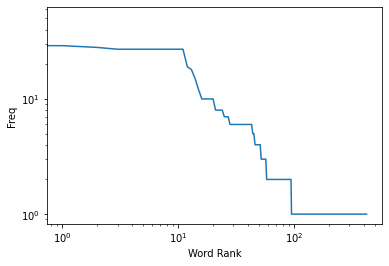

In [61]:
word_counts = sorted(Counter(words).values(), reverse=True)
import matplotlib.pyplot as plt
plt.loglog(word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")
plt.show()

### Generating histograms of words, screen names, and hashtags 
*(from Example 1-13 in Mining the Social Web):*

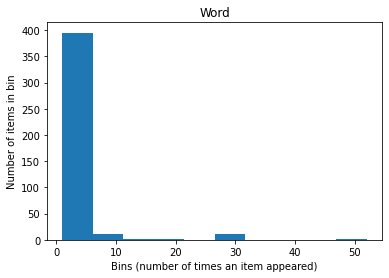

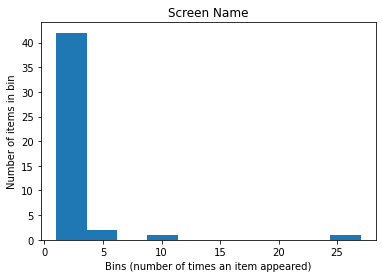

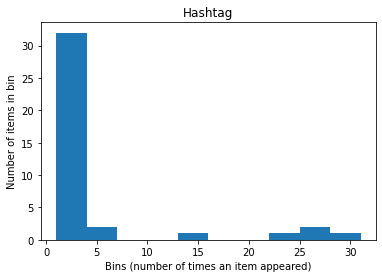

<Figure size 432x288 with 0 Axes>

In [62]:
for label, data in (('Word', words),
                    ('Screen Name', screen_names),
                    ('Hashtag', hashtags)):
    c = Counter(data)
    plt.hist(c.values())
    
    plt.title(label)
    plt.ylabel("Number of items in bin")
    plt.xlabel("Bins (number of times an item appeared)")
    
    plt.figure()

u:\courses\social web\sw_virtual_environment\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
u:\courses\social web\sw_virtual_environment\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

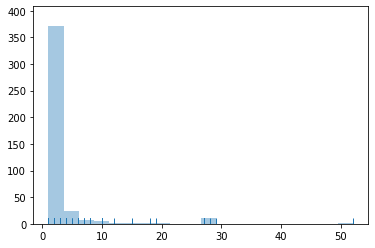

In [63]:
# extra: seaborn plots with a one-liner.
!pip install seaborn
import seaborn as sns

sns.distplot(word_counts, kde=False, rug=True)
